In [ ]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [ ]:
# Lendo o dataset
dataset = pd.read_csv('/content/sample_data/iris.csv')
dataset.head()

,sepalLengthInCM,sepalWidthInCM,petalLengthInCM,petalWidthInCM,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Verificar o tipo de dado das colunas do Dataset
dataset.dtypes

NameError: ignored

Teremos que transformar o dado categórico "class"

In [ ]:
# obtendo as classes presentes no dataset
dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# observando por alto a distribuição dos dados
dataset.describe().transpose()

NameError: ignored

In [ ]:
# Percentual de dados faltantes na base de treino
dataset.isnull().mean() *100

NameError: ignored

In [ ]:
# Gerando 3 datasets para o método heuristico One-vs-rest

dataset_setosa = dataset.copy()
for i in dataset.index:
  if(dataset.loc[i, 'class'] == 'Iris-setosa'):
    dataset_setosa.at[i, 'class'] = 1
  else:
    dataset_setosa.at[i, 'class'] = 0

dataset_setosa['class'].unique()

array([1, 0], dtype=object)

In [ ]:
dataset_versicolor = dataset.copy()
for i in dataset.index:
  if(dataset.loc[i, 'class'] == 'Iris-versicolor'):
    dataset_versicolor.at[i, 'class'] = 1
  else:
    dataset_versicolor.at[i, 'class'] = 0

dataset_versicolor['class'].unique()

array([0, 1], dtype=object)

In [ ]:
dataset_virginica = dataset.copy()
for i in dataset.index:
  if(dataset.loc[i, 'class'] == 'Iris-virginica'):
    dataset_virginica.at[i, 'class'] = 1
  else:
    dataset_virginica.at[i, 'class'] = 0

dataset_virginica['class'].unique()

array([0, 1], dtype=object)

Começando com a classificação setosa:

In [ ]:
features = ["sepalLengthInCM", "petalLengthInCM"]
X_setosa = dataset_setosa[features].to_numpy()
dataset_setosa['class'] = dataset_setosa['class'].astype('int')
y_setosa = dataset_setosa['class']

In [ ]:
X_setosa

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [ ]:
y_setosa.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [ ]:
X_versicolor = dataset_versicolor[features].to_numpy()
y_versicolor = dataset_versicolor['class']

X_virginica = dataset_virginica[features].to_numpy()
y_virginica = dataset_virginica['class']


In [ ]:
# função que gera os conjuntos de treino e teste de forma pseudo-aleatória
def generateTrainTest(X, y):
  rnd = np.random.randint(1000)
  return train_test_split(X, y, test_size=0.30, random_state=rnd)

In [ ]:
# Implementando a regressão logística
class logistic_regr:
  def __init__(self, learning_rate = 0.01, iterations = 20, limiar = 0.5):
    self.learning_rate = learning_rate # taxa de aprendizado (alpha)
    self.iterations = iterations # iterações de treino
    self.limiar = limiar # decision boundry
    self.metrics = [] # estrutura para guardar as métricas

  # função para atualizar as métricas a cada iteração do gradiente descendente
  def updateMetrics(self, iterData):
    self.metrics.append(iterData)

  def getMetrics(self):
    return self.metrics

  # Função de regressão (logística)
  def reg_function(self, X):
    h_t = 1/(1 + np.exp(-np.dot(X, self.theta)))
    for i in range(len(h_t)):
      if(h_t[i] > (2 ** 64)):
        #print('overflow')
        h_t[i] = (2 ** 64)
      elif(h_t[i] < (2 ** -64)):
        #print('underflow')
        h_t[i] = (2 ** -64)
    return h_t

  def getCost_f(self, X, y):
      # função de custo em uma iteração
      sum = 0;
      h_t = self.reg_function(X)
      for i in range(len(h_t)):
        if(y[i]):
          if(h_t[i] == 0):
            h_t[i] = (2 ** -64)
          sum += np.log(h_t[i])
        else:
          if(h_t[i] == 1):
            h_t[i] = 1-(2 ** -64)
          sum += np.log(1.0-h_t[i])
      # a implementação como função estava dando erro com log(0)
      # sum += y_i * np.log(self.reg_function(X_i)) + ((1.0-y_i) * np.log(1.0-self.reg_function(X_i)))
      J_theta = -sum/len(X)
      # retorn o valor da Função Custo
      return J_theta

  def fit(self, X_train, y_train):
    # formata os dados
    X = X_train
    y = y_train.to_numpy()
    # insere o valor 1 no início do vetor X
    # isso permite obter theta0 no produto escalar dos vetores theta_t * X
    X = np.insert(X, 0, 1, axis = 1)

    # inicia os parâmetros theta com um valor arbitrário para o gradiente
    self.theta = np.zeros(X[0].shape)

    # guarada as métricas do estado inicial
    iterData = []
    iterData.append(self.getCost_f(X, y)) # função Custo
    iterData += [self.theta[0], self.theta[1], self.theta[2], np.NaN] # thetas
    self.updateMetrics(iterData)

    # Algoritmo do gradiente descendente
    for step in range(self.iterations):

      # inicia o gradiente
      gradient = np.zeros(self.theta.shape)

      # distancia da predição
      dist = self.reg_function(X) - y

      # calcula as componentes do gradiente
      for comp in range(len(gradient)):
        # calcula a componente com base em todas as instancias
        gradient[comp] += np.dot(dist, X[:,comp])

      # multiplica o gradiente pela taxa de aprendizado (-alpha)
      gradient *= -self.learning_rate

      # atualiza theta
      self.theta += gradient

      # guarda as infos da iteração
      iterData = []
      iterData.append(self.getCost_f(X, y)) # função Custo
      # Acurácia
      y_pred = self.predict(X_train)
      acuracy = np.mean(np.equal(y_pred, y))
      iterData += [self.theta[0], self.theta[1], self.theta[2], acuracy] # thetas
      self.updateMetrics(iterData)

  def predict(self, X_test):
    # formata os dados
    # caso só tenha 1 feature, transpõe de forma que instancias fiquem nas linhas
    X = X_test
    # insere o valor 1 no início do vetor X
    # isso permite obter theta0 no produto escalar dos vetores theta_t * X
    X = np.insert(X, 0, 1, axis = 1)

    # aplica função logística
    h_theta = self.reg_function(X)

    # aplica limiar
    return np.greater_equal(h_theta, self.limiar).astype(int)

In [ ]:
X_setosa_train, X_setosa_test, y_setosa_train, y_setosa_test = generateTrainTest(X_setosa, y_setosa)

NameError: ignored

In [ ]:
# realizando a regressão para setosa
regr_setosa = logistic_regr(learning_rate=0.01, iterations=15)
regr_setosa.fit(X_setosa_train, y_setosa_train)
y_setosa_pred = regr_setosa.predict(X_setosa_test)

In [ ]:
df_setosa = pd.DataFrame(regr_setosa.getMetrics(), columns =['Função Custo', 'Theta0', 'Theta1', 'Theta2', 'Acurácia'])
df_setosa

,Função Custo,Theta0,Theta1,Theta2,Acurácia
0,0.693147,0.000000,0.000000,0.000000,NaN
1,2.973423,-0.185000,-1.359500,-1.478500,0.676190
2,0.231587,0.154958,0.341297,-0.973560,0.990476
3,0.284032,0.224986,0.628780,-1.057189,0.980952
4,1.441019,0.073841,-0.340241,-1.891286,0.676190
5,1.432782,0.409546,1.339571,-1.392483,0.323810
6,6.099362,-0.197895,-2.439578,-4.331333,0.676190
7,2.990809,0.142105,-0.738578,-3.826333,0.676190
8,0.183245,0.482060,0.962202,-3.321394,0.933333
9,0.043324,0.622771,1.662583,-3.106954,1.000000


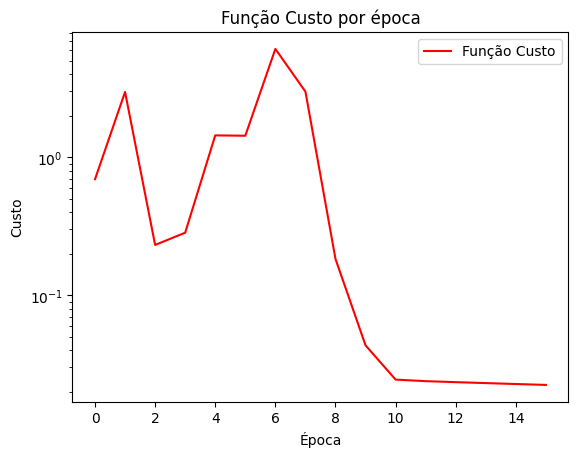

In [ ]:
# Plotando o gráfico Função custo X Época
cost = df_setosa['Função Custo']
epoch = range(16)
plt.plot(epoch, cost, color = 'red', label = 'Função Custo')

# finalziando o plot
plt.title('Função Custo por época')
plt.xlabel('Época') #x label
plt.ylabel('Custo') #y label
plt.yscale('log')
plt.legend()
plt.show()

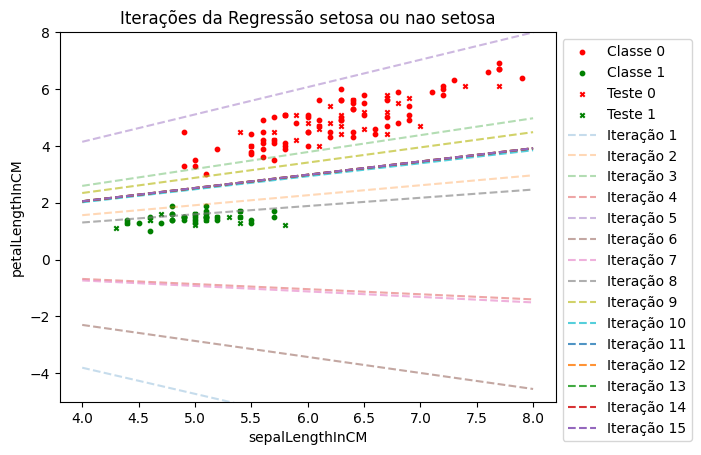

In [ ]:
# plotando os resultados da separação durante cada iteração:

# plotando os pontos
cdict = {0: 'red', 1: 'green'}
fig, ax = plt.subplots()
for group in np.unique(y_setosa_train):
  ix = np.where(y_setosa_train == group)
  ax.scatter(X_setosa_train[ix,0], X_setosa_train[ix,1], c = cdict[group], label = 'Classe ' + str(group), s = 10)
for group in np.unique(y_setosa_test):
  ix = np.where(y_setosa_test == group)
  ax.scatter(X_setosa_test[ix,0], X_setosa_test[ix,1], c = cdict[group], label = 'Teste ' + str(group), s = 10, marker = 'x')
alph = np.linspace(0.25, 1, 15)
for i in range(1,16):
  if (df_setosa['Theta2'][i] != 0):
    reg_x2 = -(df_setosa['Theta0'][i] + df_setosa['Theta1'][i] * range(4,9))/df_setosa['Theta2'][i]
  else:
    # qualquer solução possível para X2
    reg_x2 = [0 for j in range(4,9)]
  ax.plot(range(4,9), reg_x2, alpha = alph[i-1], linestyle='dashed', label = 'Iteração ' + str(i))
plt.ylim(-5, 8)
plt.title('Iterações da Regressão setosa ou nao setosa')
plt.xlabel("sepalLengthInCM") #x label
plt.ylabel( "petalLengthInCM") #y label
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

In [ ]:
# Acurácia
print('Acurácia: ', np.mean(np.equal(y_setosa_pred, y_setosa_test)), ' | suporte: ', len(y_setosa_pred))

Acurácia:  1.0  | suporte:  45


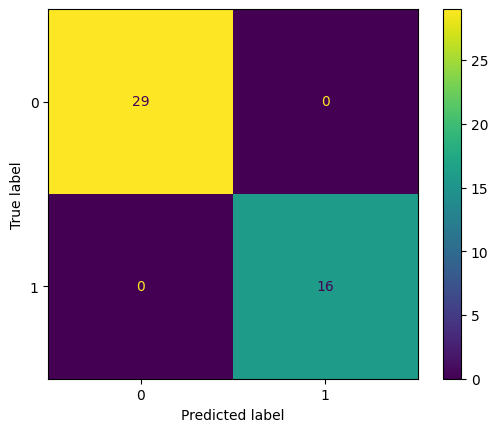

In [ ]:
# Plotando a matriz de confusão
labels = ["0","1"]
cm_setosa = metrics.confusion_matrix(y_setosa_test, y_setosa_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_setosa, display_labels=labels)
disp.plot();

Implementação das métricas

In [ ]:
# retorna as precisões de cada classe
def getPrecisions(cm):
  class0 = cm[0,0]/(cm[0,0]+cm[1,0])
  class1 = cm[1,1]/(cm[1,1]+cm[0,1])
  return class0, class1

# retorna os Recalls de cada classe
def getRecalls(cm):
  class0 = cm[0,0]/(cm[0,0]+cm[0,1])
  class1 = cm[1,1]/(cm[1,1]+cm[1,0])
  return class0, class1

# retorna os F1-scores de cada classe
def getF1_scores(cm):
  class0_p, class1_p = getPrecisions(cm)
  class0_r, class1_r = getRecalls(cm)

  class0 = 2 * class0_p * class0_r/(class0_p + class0_r)
  class1 = 2 * class1_p * class1_r/(class1_p + class1_r)
  return class0, class1

# Obtém as métricas e suas médias retornando um dataframe
def cmMetrics(cm):
  class0_support = cm[0,0] + cm[0,1]
  class1_support = cm[1,0] + cm[1,1]
  tot_support = class0_support + class1_support

  class0_p, class1_p = getPrecisions(cm)
  class0_r, class1_r = getRecalls(cm)
  class0_f1, class1_f1 = getF1_scores(cm)

  macro_p = (class0_p + class1_p)/2
  macro_r = (class0_r + class1_r)/2
  macro_f1 = (class0_f1 + class1_f1)/2

  weighted_p = (class0_support * class0_p + class1_support * class1_p)/tot_support
  weighted_r = (class0_support * class0_r + class1_support * class1_r)/tot_support
  weighted_f1 = (class0_support * class0_f1 + class1_support * class1_f1)/tot_support
  data = {'Precision': [class0_p, class1_p, macro_p, weighted_p],
          'Recall': [class0_r, class1_r, macro_r, weighted_r],
          'F1-score': [class0_f1, class1_f1, macro_f1, weighted_f1],
          'Support': [class0_support, class1_support, tot_support, tot_support]}

  df = pd.DataFrame(data, index=[ 'classe 0',
                                  'classe 1',
                                  'macro avg',
                                  'weighted avg'])
  return df


In [ ]:
cmMetrics(cm_setosa)

,Precision,Recall,F1-score,Support
classe 0,1.0,1.0,1.0,29
classe 1,1.0,1.0,1.0,16
macro avg,1.0,1.0,1.0,45
weighted avg,1.0,1.0,1.0,45


Classificação versicolor

In [ ]:
features = ["sepalLengthInCM", "petalLengthInCM"]
X_versicolor = dataset_versicolor[features].to_numpy()
dataset_versicolor['class'] = dataset_versicolor['class'].astype('int')
y_versicolor = dataset_versicolor['class']

In [ ]:
X_versicolor

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [ ]:
y_versicolor.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [ ]:
X_versicolor_train, X_versicolor_test, y_versicolor_train, y_versicolor_test = generateTrainTest(X_versicolor, y_versicolor)

In [ ]:
# realizando a regressão para versicolor
regr_versicolor = logistic_regr(learning_rate=0.002, iterations=100)
regr_versicolor.fit(X_versicolor_train, y_versicolor_train)
y_versicolor_pred = regr_versicolor.predict(X_versicolor_test)

In [ ]:
df_versicolor = pd.DataFrame(regr_versicolor.getMetrics(), columns =['Função Custo', 'Theta0', 'Theta1', 'Theta2', 'Acurácia'])
df_versicolor

,Função Custo,Theta0,Theta1,Theta2,Acurácia
0,0.693147,0.000000,0.000000,0.000000,NaN
1,0.738994,-0.039000,-0.218300,-0.109800,0.685714
2,0.715448,-0.006359,-0.012562,0.062060,0.333333
3,0.787232,-0.053176,-0.279995,-0.086110,0.685714
4,0.719920,-0.013440,-0.034266,0.108729,0.647619
...,...,...,...,...,...
96,0.702913,-0.044629,-0.321048,0.541064,0.657143
97,0.771213,-0.088079,-0.588699,0.349798,0.685714
98,0.702900,-0.043445,-0.321856,0.541912,0.657143
99,0.771122,-0.086879,-0.589432,0.350636,0.685714


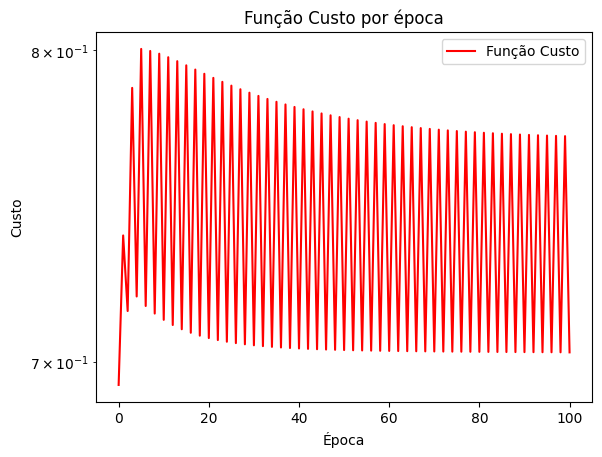

In [ ]:
# Plotando o gráfico Função custo X Época
cost = df_versicolor['Função Custo']
epoch = range(101)
plt.plot(epoch, cost, color = 'red', label = 'Função Custo')

# finalziando o plot
plt.title('Função Custo por época')
plt.xlabel('Época') #x label
plt.ylabel('Custo') #y label
plt.yscale('log')
plt.legend()
plt.show()

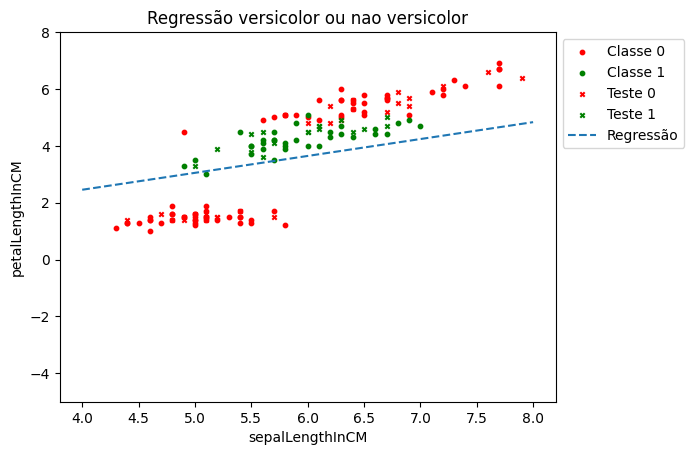

In [ ]:
# plotando os resultados da separação durante cada iteração:

# plotando os pontos
cdict = {0: 'red', 1: 'green'}
fig, ax = plt.subplots()
for group in np.unique(y_versicolor_train):
  ix = np.where(y_versicolor_train == group)
  ax.scatter(X_versicolor_train[ix,0], X_versicolor_train[ix,1], c = cdict[group], label = 'Classe ' + str(group), s = 10)
for group in np.unique(y_versicolor_test):
  ix = np.where(y_versicolor_test == group)
  ax.scatter(X_versicolor_test[ix,0], X_versicolor_test[ix,1], c = cdict[group], label = 'Teste ' + str(group), s = 10, marker = 'x')
if (df_versicolor['Theta2'].iloc[-1] != 0):
  reg_x2 = -(df_versicolor['Theta0'].iloc[-1] + df_versicolor['Theta1'].iloc[-1] * range(4,9))/df_versicolor['Theta2'].iloc[-1]
else:
  # qualquer solução possível para X2
  reg_x2 = [0 for j in range(4,9)]
ax.plot(range(4,9), reg_x2, linestyle='dashed', label = 'Regressão')
plt.ylim(-5, 8)
plt.title('Regressão versicolor ou nao versicolor')
plt.xlabel("sepalLengthInCM") #x label
plt.ylabel( "petalLengthInCM") #y label
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

In [ ]:
# Acurácia
print('Acurácia: ', np.mean(np.equal(y_versicolor_pred, y_versicolor_test)), ' | suporte: ', len(y_versicolor_pred))

Acurácia:  0.6666666666666666  | suporte:  45


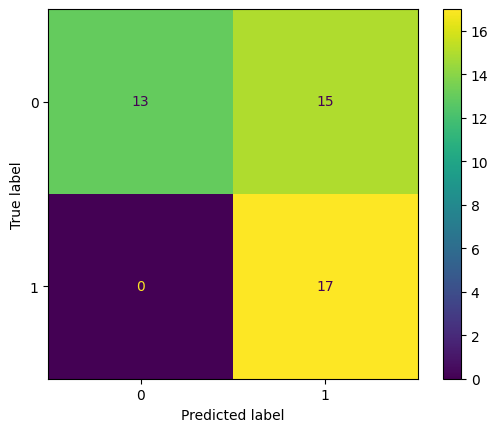

In [ ]:
# Plotando a matriz de confusão
labels = ["0","1"]
cm_versicolor = metrics.confusion_matrix(y_versicolor_test, y_versicolor_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_versicolor, display_labels=labels)
disp.plot();

In [ ]:
cmMetrics(cm_versicolor)

,Precision,Recall,F1-score,Support
classe 0,1.000000,0.464286,0.634146,28
classe 1,0.531250,1.000000,0.693878,17
macro avg,0.765625,0.732143,0.664012,45
weighted avg,0.822917,0.666667,0.656711,45


Classificação virginica

In [ ]:
features = ["sepalLengthInCM", "petalLengthInCM"]
X_virginica = dataset_virginica[features].to_numpy()
dataset_virginica['class'] = dataset_virginica['class'].astype('int')
y_virginica = dataset_virginica['class']

In [ ]:
X_virginica

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [ ]:
y_virginica.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [ ]:
X_virginica_train, X_virginica_test, y_virginica_train, y_virginica_test = generateTrainTest(X_virginica, y_virginica)

In [ ]:
# realizando a regressão para virginica
regr_virginica = logistic_regr(learning_rate=0.002, iterations=100)
regr_virginica.fit(X_virginica_train, y_virginica_train)
y_virginica_pred = regr_virginica.predict(X_virginica_test)

In [ ]:
df_virginica = pd.DataFrame(regr_virginica.getMetrics(), columns =['Função Custo', 'Theta0', 'Theta1', 'Theta2', 'Acurácia'])
df_virginica

,Função Custo,Theta0,Theta1,Theta2,Acurácia
0,0.693147,0.000000,0.000000,0.000000,NaN
1,0.710094,-0.045000,-0.216600,-0.057800,0.714286
2,0.694113,-0.023671,-0.044253,0.141459,0.600000
3,0.757037,-0.081198,-0.339959,0.019260,0.714286
4,0.686792,-0.047279,-0.096862,0.259444,0.619048
...,...,...,...,...,...
96,0.285412,-0.584388,-1.390512,1.862867,0.914286
97,0.284764,-0.588112,-1.398770,1.870542,0.914286
98,0.284124,-0.591306,-1.403779,1.880673,0.914286
99,0.283492,-0.594919,-1.411441,1.888648,0.923810


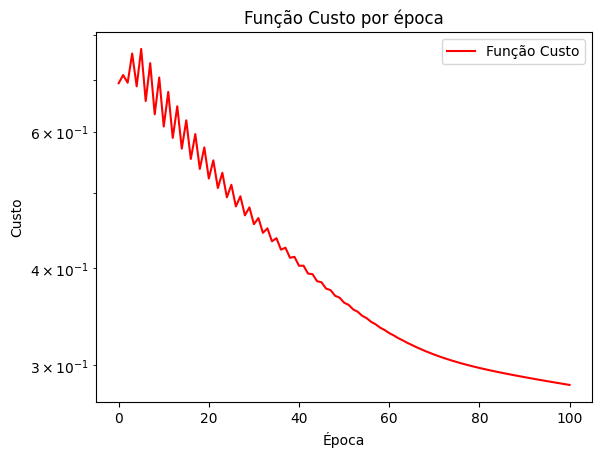

In [ ]:
# Plotando o gráfico Função custo X Época
cost = df_virginica['Função Custo']
epoch = range(101)
plt.plot(epoch, cost, color = 'red', label = 'Função Custo')

# finalziando o plot
plt.title('Função Custo por época')
plt.xlabel('Época') #x label
plt.ylabel('Custo') #y label
plt.yscale('log')
plt.legend()
plt.show()

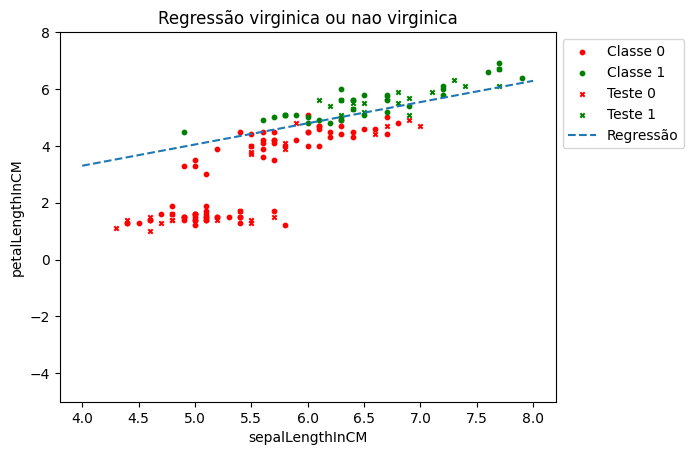

In [ ]:
# plotando os resultados da separação durante cada iteração:

# plotando os pontos
cdict = {0: 'red', 1: 'green'}
fig, ax = plt.subplots()
for group in np.unique(y_virginica_train):
  ix = np.where(y_virginica_train == group)
  ax.scatter(X_virginica_train[ix,0], X_virginica_train[ix,1], c = cdict[group], label = 'Classe ' + str(group), s = 10)
for group in np.unique(y_virginica_test):
  ix = np.where(y_virginica_test == group)
  ax.scatter(X_virginica_test[ix,0], X_virginica_test[ix,1], c = cdict[group], label = 'Teste ' + str(group), s = 10, marker = 'x')
if (df_virginica['Theta2'].iloc[-1] != 0):
  reg_x2 = -(df_virginica['Theta0'].iloc[-1] + df_virginica['Theta1'].iloc[-1] * range(4,9))/df_virginica['Theta2'].iloc[-1]
else:
  # qualquer solução possível para X2
  reg_x2 = [0 for j in range(4,9)]
ax.plot(range(4,9), reg_x2, linestyle='dashed', label = 'Regressão')
plt.ylim(-5, 8)
plt.title('Regressão virginica ou nao virginica')
plt.xlabel("sepalLengthInCM") #x label
plt.ylabel( "petalLengthInCM") #y label
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

In [ ]:
# Acurácia
print('Acurácia: ', np.mean(np.equal(y_virginica_pred, y_virginica_test)), ' | suporte: ', len(y_virginica_pred))

Acurácia:  0.9555555555555556  | suporte:  45


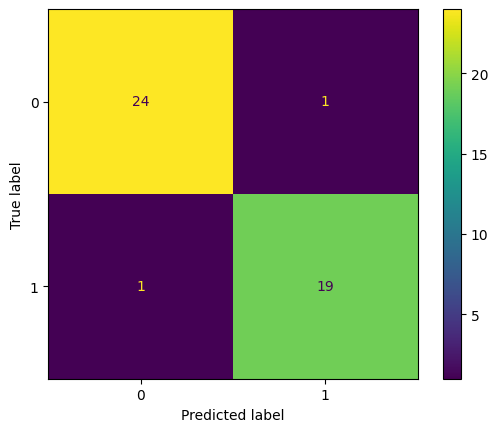

In [ ]:
# Plotando a matriz de confusão
labels = ["0","1"]
cm_virginica = metrics.confusion_matrix(y_virginica_test, y_virginica_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_virginica, display_labels=labels)
disp.plot();

In [ ]:
cmMetrics(cm_virginica)

,Precision,Recall,F1-score,Support
classe 0,0.960000,0.960000,0.960000,25
classe 1,0.950000,0.950000,0.950000,20
macro avg,0.955000,0.955000,0.955000,45
weighted avg,0.955556,0.955556,0.955556,45


Calculando as probabilidades para cada regressão J=j

P(Y=J|X=x)

In [ ]:
def p_y(X):
  # formatando X
  X = np.insert(X, 0, 1, axis = 1)

  thetas = [[df_setosa['Theta0'].iloc[-1], df_setosa['Theta1'].iloc[-1], df_setosa['Theta2'].iloc[-1]],
            [df_versicolor['Theta0'].iloc[-1], df_versicolor['Theta1'].iloc[-1], df_versicolor['Theta2'].iloc[-1]],
            [df_virginica['Theta0'].iloc[-1], df_virginica['Theta1'].iloc[-1], df_virginica['Theta2'].iloc[-1]]]

  t0 = np.array([thetas[0]]).T
  t1 = np.array([thetas[1]]).T
  t2 = np.array([thetas[2]]).T

  sum = np.exp(np.dot(X, t0))
  sum += np.exp(np.dot(X, t1))

  p_setosa = np.exp(np.dot(X, t0)) / (1 + sum)

  p_versicolor = np.exp(np.dot(X, t1)) / (1 + sum)

  p_virginica = 1 / (1 + sum)

  return p_setosa, p_versicolor, p_virginica

In [ ]:
# usando todo o conjunto
X = dataset[features].to_numpy()
y = dataset['class']

In [ ]:
p_setosa, p_versicolor, p_virginica = p_y(X)

In [ ]:
y_class = []
for i in range(len(y)):
  if(p_setosa[i] >= p_versicolor[i] and p_setosa[i] >= p_virginica[i]):
    y_class.append('Iris-setosa')
  elif(p_versicolor[i] >= p_setosa[i] and p_versicolor[i] >= p_virginica[i]):
    y_class.append('Iris-versicolor')
  else:
    y_class.append('Iris-virginica')

# Acurácia
print('Acurácia: ', np.mean(np.equal(y_class, y)), ' | suporte: ', len(y))

Acurácia:  0.66  | suporte:  150


Conseguimos uma acurácia final, de 0.66 sobre todo o dataset